In [1]:
!pip install gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [2]:
import pandas as pd # pandas k√ºt√ºphanesini i√ße aktar ve 'pd' olarak kƒ±salt
import matplotlib.pyplot as plt # matplotlib.pyplot k√ºt√ºphanesini i√ße aktar ve 'plt' olarak kƒ±salt
pd.set_option('display.max_colwidth', None) # DataFrame'deki s√ºtun geni≈üliƒüi i√ßin maksimum karakter sayƒ±sƒ±nƒ± sƒ±nƒ±rsƒ±z yap
pd.set_option('display.max_columns', None) # DataFrame'deki g√∂r√ºnt√ºlenecek maksimum s√ºtun sayƒ±sƒ±nƒ± sƒ±nƒ±rsƒ±z yap
pd.set_option('display.width', 200) # Konsol √ßƒ±ktƒ±sƒ±nƒ±n geni≈üliƒüini ayarla
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Ondalƒ±klƒ± sayƒ±larƒ± 2 basamaklƒ± olarak bi√ßimlendir

## üìö **Corpus**

Doƒüal dil i≈üleme (Natural Language Processing ‚Äì NLP) √ßalƒ±≈ümalarƒ±nda **corpus**, analiz edilen metinlerin b√ºt√ºn√ºn√º ifade eder.  
Corpus, ara≈ütƒ±rmacƒ±nƒ±n incelemek istediƒüi belirli bir dilsel baƒülam veya i√ßerik alanƒ±na ait belgelerin, yazƒ±larƒ±n ya da konu≈ümalarƒ±n sistemli ≈üekilde derlenmi≈ü h√¢lidir.  

**√ñrnekler:**
- Bir yazarƒ±n t√ºm kitaplarƒ±  
- Wikipedia maddeleri  
- Belirli bir web sitesindeki makaleler veya blog yazƒ±larƒ±  

üîé **Not:**  
- "Corpus" kelimesinin √ßoƒüul hali **corpora** ≈üeklindedir.  
- Bir corpus, NLP uygulamalarƒ±nda modelin √∂ƒürenmesi i√ßin temel veri kaynaƒüƒ±nƒ± olu≈üturur.

## üî° **Word Embeddings: Word2Vec ve GloVe**

Doƒüal dil i≈üleme √ßalƒ±≈ümalarƒ±nda **Word2Vec**, kelimelerin sayƒ±sal uzayda **vekt√∂rler** ile temsil edilmesini saƒülayan √∂nemli bir y√∂ntemdir.  

### One-Hot Representation ve Sƒ±nƒ±rlƒ±lƒ±klarƒ±
- Kelimeler, **one-hot vekt√∂rler** (√∂rneƒüin `[0,0,1,0,...]`) ile temsil edilebilir.  
- Ancak bu g√∂sterim, **kelimeler arasƒ± benzerliƒüi** yakalayamaz.  
- "kedi" ve "k√∂pek" gibi benzer anlamlara sahip kelimeler, one-hot vekt√∂rlerde tamamen baƒüƒ±msƒ±z boyutlarda bulunur.  

### Word2Vec ile Vekt√∂r Temsili
- Her kelime i√ßin bir vekt√∂r olu≈üturulur.  
- Bu vekt√∂rler, kelimeler arasƒ±ndaki **anlamsal bilgiyi** saklar.  
- Benzer kelimeler, **vekt√∂r uzayƒ±nda birbirine yakƒ±n** konumlanƒ±r.  

### Daƒüƒ±tƒ±msal Anlam Teorisi
Word2Vec ve GloVe y√∂ntemleri, **Daƒüƒ±tƒ±msal Anlam Teorisi** (Distributional Semantics) √ºzerine kuruludur:  
> Bir kelimenin anlamƒ±, bulunduƒüu **baƒülamdaki diƒüer kelimelerden** √∂ƒürenilebilir.  

---

### ‚öôÔ∏è **Temel Y√∂ntemler**

#### 1. **Word2Vec**
- Kelimelerin **baƒülamlarƒ±na g√∂re** (yakƒ±nƒ±ndaki kelimelerle birlikte) anlamƒ±nƒ± √∂ƒürenir.  
- ƒ∞ki temel mimarisi vardƒ±r:  
  - **CBOW (Continuous Bag of Words):** Baƒülamdan hedef kelimeyi tahmin eder.  
  - **Skip-Gram:** Hedef kelimeden baƒülamƒ± tahmin eder.  

#### 2. **GloVe (Global Vectors for Word Representation)**
- **Kelime √ßiftlerinin birlikte g√∂r√ºlme olasƒ±lƒ±klarƒ±** √ºzerinden global bir istatistiksel model kurar.  
- B√ºy√ºk boyutlu bir **co-occurrence (birlikte bulunma)** matrisini fakt√∂rize eder.  
- B√∂ylece kelimeler arasƒ±ndaki **global baƒülam bilgisi** vekt√∂rlerde kodlanmƒ±≈ü olur.  

---

### üéØ Kar≈üƒ±la≈ütƒ±rma
- **Word2Vec:** Yerel baƒülama (yakƒ±n kelimelere) odaklanƒ±r.  
- **GloVe:** Global istatistiksel bilgiyi (t√ºm corpus‚Äôtaki birlikte bulunma oranlarƒ±nƒ±) dikkate alƒ±r.  

Her iki y√∂ntem de kelimeleri vekt√∂rlere d√∂n√º≈üt√ºrerek **√∂rnek temelli √∂ƒürenme** ve **baƒülam ili≈ükilerini modelleme** amacƒ± ta≈üƒ±r; ancak farklƒ± √∂ƒürenme stratejileri kullanƒ±r.  


# Word2vec

In [3]:
# Not: Kelimelerin etrafƒ±ndaki diƒüer kelimeler, o kelimenin anlamƒ±nƒ± temsil edebilir.
# Yani kelimeleri sayƒ±lar (vekt√∂rler) ile temsil ettiƒüimizde, birbirine yakƒ±n olan vekt√∂rler benzer anlamlƒ± kelimeleri g√∂sterebilir.

from sklearn.manifold import TSNE
# sklearn k√ºt√ºphanesinden TSNE (t-daƒüƒ±lƒ±mlƒ± Stokastik Kom≈üuluk G√∂mme) fonksiyonunu i√ße aktarƒ±yoruz.
# TSNE, y√ºksek boyutlu verileri (√∂rneƒüin kelime vekt√∂rlerini) 2D veya 3D d√ºzleme indirerek g√∂rselle≈ütirmeye yarar.

# h√ºrriyetteki haberler:
df = open('/content/hurriyet.txt', 'r', encoding='utf8')
# open() fonksiyonu ile 'hurriyet.txt' adlƒ± metin dosyasƒ±nƒ± a√ßƒ±yoruz.
# 'r' parametresi dosyayƒ± okuma modunda a√ßmamƒ±zƒ± saƒülar.
# encoding='utf8' T√ºrk√ße karakterlerin doƒüru okunabilmesi i√ßin kullanƒ±lƒ±r.

In [4]:
text = df.read()
# read() fonksiyonu dosyanƒ±n i√ßindeki t√ºm veriyi 'text' deƒüi≈ükenine y√ºkler.
# Yani t√ºm haberler artƒ±k 'text' i√ßinde uzun bir string (metin) olarak tutuluyor.

In [5]:
t_list = text.split('\n')
# split('\n') ile metni satƒ±rlara ayƒ±rƒ±yoruz.
# B√∂ylece her satƒ±r (√∂rneƒüin her haber ya da c√ºmle) t_list listesine ayrƒ± bir eleman olarak ekleniyor.

In [7]:
corpus = []
# corpus adƒ±nda bo≈ü bir liste olu≈üturuyoruz.
# Bu liste, c√ºmleleri kelimelerine ayrƒ±lmƒ±≈ü ≈üekilde depolayacak.

In [8]:
for cumle in t_list:
    corpus.append(cumle.split())
    # Her bir satƒ±rdaki (c√ºmledeki) kelimeleri split() ile bo≈üluklardan ayƒ±rƒ±yoruz.
    # Bu i≈ülem sonucunda ['Bug√ºn', 'hava', 'g√ºzel'] gibi kelime listeleri olu≈üuyor.
    # corpus listesine bu kelime listelerini ekliyoruz.
    # Yani corpus, "liste i√ßinde liste" yapƒ±sƒ±nda olacak:
    # [['Bug√ºn', 'hava', 'g√ºzel'], ['Ekonomi', 'y√ºkseli≈üte'], ...]

## üõ†Ô∏è `simple_preprocess`

Doƒüal dil i≈üleme (NLP) √ßalƒ±≈ümalarƒ±nda kullanƒ±lan **`gensim.utils.simple_preprocess`** fonksiyonu, metinleri temizleyip tokenlere (kelime par√ßacƒ±klarƒ±na) ayƒ±rmak i√ßin sƒ±klƒ±kla tercih edilir.  

### üîé Fonksiyonun √ñzellikleri
- Metni **k√º√ß√ºk harfe** d√∂n√º≈üt√ºr√ºr.  
- **Noktalama i≈üaretlerini** kaldƒ±rƒ±r.  
- **Sayƒ±larƒ± ve √∂zel karakterleri** temizler.  
- Belirli uzunlukta kelimeleri alƒ±r  
  - Varsayƒ±lan: **2‚Äì15 harf** uzunluƒüundaki kelimeler.  
- Metni **token‚Äôlara** (kelime listesine) ayƒ±rƒ±r.  

### üìå √ñrnek Kullanƒ±m
```python
from gensim.utils import simple_preprocess

text = "Merhaba! Bu, NLP i√ßin bir #√∂rnek 123 metindir."
tokens = simple_preprocess(text)
print(tokens)

In [9]:
cleaned_cumle = [simple_preprocess(sentence)for sentence in t_list]
cleaned_cumle

[['iran',
  'devlet',
  'televizyonu',
  '√ºlkedeki',
  'eyaletin',
  'sinde',
  'yapƒ±lan',
  'reformcularƒ±',
  'protesto',
  'ama√ßlƒ±',
  'y√ºr√ºy√º≈ülere',
  'milyonlarca',
  'ki≈üinin',
  'katƒ±ldƒ±ƒüƒ±nƒ±',
  'bildirdi'],
 ['g√∂sterilerde',
  'fitnecilere',
  '√∂l√ºm',
  'm√ºnafƒ±klara',
  '√∂l√ºm',
  'abd',
  'ye',
  '√∂l√ºm',
  'ingiltere',
  'ye',
  '√∂l√ºm',
  'sloganlarƒ±',
  'atƒ±ldƒ±'],
 ['dini',
  'lider',
  'ali',
  'hamaney',
  've',
  'cumhurba≈ükanƒ±',
  'mahmud',
  'ahmedinejad',
  'destekleyen',
  'iranlƒ±lar',
  'son',
  'olaylarda',
  'yeƒüeni',
  '√∂ld√ºr√ºlen',
  'mir',
  'h√ºseyin',
  'musevi',
  'ba≈üta',
  'olmak',
  '√ºzere',
  'muhalefet',
  'liderlerini',
  'kƒ±nadƒ±lar'],
 ['musevi', 'ye', '√∂l√ºm', 've', 'idam', 'idam', 'sloganlarƒ±', 'duyuldu'],
 ['muhalefet',
  'liderleri',
  'ka√ßtƒ±',
  'mƒ±',
  'a≈üure',
  'g√ºn√º',
  'ya≈üanan',
  '√ßatƒ±≈ümalarda',
  'devlet',
  'kaynaklarƒ±na',
  'g√∂re',
  'ter√∂rist',
  'olmak',
  '√ºzere',
  'ki≈üi',
  '√∂lm√

In [10]:
print(cleaned_cumle[:10])

[['iran', 'devlet', 'televizyonu', '√ºlkedeki', 'eyaletin', 'sinde', 'yapƒ±lan', 'reformcularƒ±', 'protesto', 'ama√ßlƒ±', 'y√ºr√ºy√º≈ülere', 'milyonlarca', 'ki≈üinin', 'katƒ±ldƒ±ƒüƒ±nƒ±', 'bildirdi'], ['g√∂sterilerde', 'fitnecilere', '√∂l√ºm', 'm√ºnafƒ±klara', '√∂l√ºm', 'abd', 'ye', '√∂l√ºm', 'ingiltere', 'ye', '√∂l√ºm', 'sloganlarƒ±', 'atƒ±ldƒ±'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurba≈ükanƒ±', 'mahmud', 'ahmedinejad', 'destekleyen', 'iranlƒ±lar', 'son', 'olaylarda', 'yeƒüeni', '√∂ld√ºr√ºlen', 'mir', 'h√ºseyin', 'musevi', 'ba≈üta', 'olmak', '√ºzere', 'muhalefet', 'liderlerini', 'kƒ±nadƒ±lar'], ['musevi', 'ye', '√∂l√ºm', 've', 'idam', 'idam', 'sloganlarƒ±', 'duyuldu'], ['muhalefet', 'liderleri', 'ka√ßtƒ±', 'mƒ±', 'a≈üure', 'g√ºn√º', 'ya≈üanan', '√ßatƒ±≈ümalarda', 'devlet', 'kaynaklarƒ±na', 'g√∂re', 'ter√∂rist', 'olmak', '√ºzere', 'ki≈üi', '√∂lm√º≈üt√º'], ['den', 'fazla', 'ki≈üinin', 'yaralandƒ±ƒüƒ±', 'olaylar', 'sƒ±rasƒ±nda', 'en', 'az', 'ki≈üi', 'tutuklanmƒ±≈ütƒ±'], ['√∂t

In [11]:
# "cleaned_cumle" isimli deƒüi≈ükende, √∂nceden temizlenmi≈ü c√ºmlelerimiz var.
# Bu c√ºmleleri Word2Vec modeline vererek, kelimelerin sayƒ±sal (vekt√∂r) temsillerini olu≈üturacaƒüƒ±z.
# Vekt√∂rler, kelimeler arasƒ±ndaki anlamsal benzerlikleri (√∂rneƒüin "kral" ~ "krali√ße") yansƒ±tabilir.

Word2vec_model = Word2Vec(
    sentences=cleaned_cumle,   # Girdi olarak kelimelere ayrƒ±lmƒ±≈ü c√ºmleleri alƒ±yor
    vector_size=100,           # Her kelime 100 boyutlu bir sayƒ± vekt√∂r√º ile temsil edilecek
    window=5,                  # Bir kelimeyi √∂ƒürenirken, saƒüdan ve soldan 5 kelime baƒülam olarak dikkate alƒ±nacak
    min_count=5,               # Corpus i√ßinde en az 5 kez ge√ßen kelimeler modele dahil edilecek
    sg=1                       # sg=1 ‚Üí Skip-Gram y√∂ntemi kullanƒ±lƒ±r
                               # sg=0 olsaydƒ± ‚Üí CBOW (Continuous Bag of Words) y√∂ntemi kullanƒ±lƒ±rdƒ±
)

## üß† Word2Vec Mimarƒ±larƒ±: CBOW ve Skip-Gram

Word2Vec algoritmasƒ±, kelimeleri **vekt√∂r uzayƒ±nda** temsil etmek i√ßin iki temel mimari kullanƒ±r: **CBOW** ve **Skip-gram**.  

---

### üîπ CBOW (Continuous Bag of Words)
- **Ama√ß:** √áevredeki kelimeleri (**context**) kullanarak hedef kelimeyi tahmin eder.  
- **Avantajlarƒ±:**  
  - Daha hƒ±zlƒ±dƒ±r.  
  - K√º√ß√ºk veri setlerinde etkili sonu√ßlar verir.  
- **√ñrnek:**  
  - C√ºmle: *‚ÄúKedi s√ºt i√ßiyor‚Äù*  
  - Baƒülam (context): *[kedi, i√ßiyor]*  
  - Hedef (target): *s√ºt*  

---

### üîπ Skip-Gram
- **Ama√ß:** Verilen bir kelimeden, √ßevresindeki kelimeleri tahmin eder.  
- **Avantajlarƒ±:**  
  - Nadir (seyrek) kelimeler i√ßin daha ba≈üarƒ±lƒ±dƒ±r.  
  - B√ºy√ºk veri setlerinde daha iyi sonu√ßlar √ºretir.  
- **√ñrnek:**  
  - C√ºmle: *‚ÄúKedi s√ºt i√ßiyor‚Äù*  
  - Hedef (target): *s√ºt*  
  - Baƒülam (context): *[kedi, i√ßiyor]*  

---

### üéØ Kar≈üƒ±la≈ütƒ±rma
- **CBOW:** Hƒ±zlƒ±, k√º√ß√ºk veri setlerinde uygun, sƒ±k g√∂r√ºlen kelimelerde iyi.  
- **Skip-Gram:** Daha yava≈ü, ancak nadir kelimeler ve b√ºy√ºk corpus‚Äôlarda daha ba≈üarƒ±lƒ±.  

In [12]:
# .wv √∂zelliƒüi, eƒüitilmi≈ü Word2Vec modelinin "kelime vekt√∂rlerini" (word vectors) tutar.
# Yani her kelimenin sayƒ±sal temsiline buradan ula≈üƒ±rƒ±z.

# √ñrneƒüin "ankara" kelimesinin vekt√∂r√ºn√º √ßaƒüƒ±rƒ±yoruz:
Word2vec_model.wv['ankara']

# √áƒ±ktƒ±: 100 boyutlu bir vekt√∂r (√ß√ºnk√º modelde vector_size=100 se√ßmi≈ütik).
# Bu vekt√∂r ≈ü√∂yle bir sayƒ± dizisi olacak (√∂rnek):
# array([ 0.012, -0.034, 0.078, ..., -0.056])
# Her sayƒ±, "ankara" kelimesinin anlamƒ±nƒ± sayƒ±sal uzayda bir eksen √ºzerinde temsil eder.

array([ 0.02845206,  0.503354  , -0.22155254, -0.67719656,  0.55146015,
       -0.3180006 ,  0.20641613,  0.46428153, -0.47503427, -0.09733783,
       -0.05082089, -0.36999476, -0.10295787, -0.16292745,  0.22779648,
        0.23688427,  0.72570664, -0.1507148 , -0.96147656, -0.90298444,
       -0.3021462 ,  0.54089904, -0.06310517, -0.12676026,  0.12611893,
       -0.2839338 , -0.2541843 , -0.22980224,  0.03472398,  0.11327336,
        0.39946058,  0.25685328,  0.4195686 , -0.07684073, -0.16161048,
        0.2193842 , -0.19713037, -0.34959662,  0.2095697 , -0.58333457,
        0.4157193 , -0.2763144 , -0.10985024,  0.08166302,  0.02772969,
       -0.58262366, -0.37670553,  0.14365026, -0.03703157,  0.41645914,
       -0.23544787, -0.12765144,  0.16658446,  0.07719702, -0.1528529 ,
        0.4086079 , -0.14148887, -0.17780106, -0.13407339, -0.2879371 ,
        0.09261525, -0.3225526 ,  0.1173846 ,  0.16288064,  0.44318584,
        0.14453268,  0.1335454 ,  0.2717193 , -0.67451286,  0.46

In [13]:
# most_similar() fonksiyonu, bir kelimeye en √ßok benzeyen diƒüer kelimeleri bulur.
# Burada benzerlik, vekt√∂rler arasƒ±ndaki "kosin√ºs benzerliƒüi" √∂l√ß√ºs√ºne g√∂re hesaplanƒ±r.

# "ankara" kelimesine en √ßok benzeyen ilk 10 kelimeyi getirelim:
Word2vec_model.wv.most_similar('ankara', topn=10)

# √áƒ±ktƒ±, ≈ü√∂yle bir liste olur:
# [('istanbul', 0.87), ('izmir', 0.81), ('eski≈üehir', 0.79), ...]
# Buradaki 0.xx deƒüerleri, benzerlik skorudur (1'e ne kadar yakƒ±nsa o kadar benzer).

[('washington', 0.7208757996559143),
 ('karlov', 0.711492121219635),
 ('baily', 0.70626300573349),
 ('maslahatg√ºzarƒ±', 0.697924017906189),
 ('gaby', 0.6922387480735779),
 ('pa√ßacƒ±', 0.6908566951751709),
 ('√ßaƒürƒ±lmƒ±≈ütƒ±', 0.6901565790176392),
 ('temsilciliƒüine', 0.6842807531356812),
 ('moskova', 0.6830278635025024),
 ('kaymak√ßƒ±', 0.6821234226226807)]

In [14]:
# "hollanda" kelimesine en √ßok benzeyen 10 kelimeyi bulalƒ±m.
# Yine most_similar fonksiyonunu kullanƒ±yoruz.
# Benzerlikler, kelime vekt√∂rleri arasƒ±ndaki kosin√ºs benzerliƒüine g√∂re √∂l√ß√ºl√ºr.

Word2vec_model.wv.most_similar('hollanda', topn=10)

# √áƒ±ktƒ±, ≈üu formda olur:
# [('almanya', 0.84), ('bel√ßika', 0.81), ('fransa', 0.79), ...]
# Buradaki sayƒ±lar, benzerlik skorlarƒ±dƒ±r (0 ile 1 arasƒ±nda).

[('danimarka', 0.8037834763526917),
 ('bel√ßika', 0.7995167374610901),
 ('avusturya', 0.7953385710716248),
 ('kanada', 0.7799175381660461),
 ('finlandiya', 0.7738327980041504),
 ('almanya', 0.7701987028121948),
 ('ispanya', 0.7517932653427124),
 ('avustralya', 0.7461855411529541),
 ('estonya', 0.7423365712165833),
 ('letonya', 0.7298974990844727)]

In [15]:
# Analojik sorgular (analogy queries), Word2Vec'in en g√º√ßl√º taraflarƒ±ndan biridir.
# Ama√ß: "A, B ile nasƒ±l ili≈ükiliyse; C de ? ile √∂yledir." ≈üeklinde d√º≈ü√ºnmektir.

# Burada sorulan soru ≈üudur:
# woman : man = ? : son
# yani "kadƒ±n, erkek ile nasƒ±l ili≈ükiliyse; ? de oƒüul ile √∂yledir."

result = Word2vec_model.wv.most_similar(
    positive=['woman', 'son'],   # Olumlu (eklenecek) kelimeler
    negative=['man'],            # √áƒ±karƒ±lacak kelime
    topn=1                       # En benzer 1 sonucu getir
)

print(result)

# √áƒ±ktƒ± genellikle ≈ü√∂yle bir ≈üey olabilir:
# [('daughter', 0.89)]
# Yorum: "Kadƒ±n, erkeƒüin kar≈üƒ±lƒ±ƒüƒ±ysa ‚Üí oƒülun kar≈üƒ±lƒ±ƒüƒ± da kƒ±zdƒ±r."


[('√∂n√ºm√ºzdeki', 0.6301471590995789)]


In [16]:
# ---- Word2Vec Modelinin Kaydedilmesi ----
# Eƒüitilen modeli diske kaydedelim.
# B√∂ylece her seferinde yeniden eƒüitmek zorunda kalmayƒ±z.

Word2vec_model.save("word2vec.model")


# ---- Word2Vec Modelinin Y√ºklenmesi ----
# Daha sonra ihtiyacƒ±mƒ±z olduƒüunda, kaydedilen modeli geri √ßaƒüƒ±rabiliriz.
# Bu sayede doƒürudan eƒüitilmi≈ü vekt√∂rleri kullanmaya devam ederiz.

Word2vec_model = Word2Vec.load("word2vec.model")

# üåê Word2Vec G√∂rselle≈ütirme

Eƒüitilen Word2Vec modelindeki kelime vekt√∂rlerini g√∂rselle≈ütirerek, kelimeler arasƒ±ndaki **anlamsal yakƒ±nlƒ±klarƒ±n** nasƒ±l ortaya √ßƒ±ktƒ±ƒüƒ±nƒ± inceleyebiliriz.  
Bu t√ºr g√∂rselle≈ütirmeler, kelimelerin y√ºksek boyutlu vekt√∂r uzayƒ±ndaki konumlarƒ±nƒ± 2B ya da 3B d√ºzlemde anlamamƒ±za yardƒ±mcƒ± olur.  

---

## üîé Kullanƒ±lan Teknikler
- **t-SNE (t-distributed Stochastic Neighbor Embedding):**  
  Y√ºksek boyutlu vekt√∂rleri 2 veya 3 boyuta indirger, benzer vekt√∂rlerin g√∂rsel olarak yakƒ±n konumlanmasƒ±nƒ± saƒülar.  

- **PCA (Principal Component Analysis):**  
  Boyut indirgeme i√ßin daha hƒ±zlƒ±, deterministik bir y√∂ntemdir. Genel eƒüilimleri g√∂stermek i√ßin kullanƒ±lƒ±r.  

---

## üìå √ñrnek Python Kodu
```python
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# √ñrnek: Eƒüitilmi≈ü Word2Vec modelinden kelime vekt√∂rlerini alalƒ±m
words = list(model.wv.index_to_key[:200])  # ƒ∞lk 200 kelimeyi se√ßelim
word_vectors = model.wv[words]

# Boyut indirgeme (√∂nce PCA ile hƒ±zlandƒ±rma, sonra t-SNE)
pca = PCA(n_components=50)
pca_result = pca.fit_transform(word_vectors)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(pca_result)

# G√∂rselle≈ütirme
plt.figure(figsize=(14, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]))

plt.title("Word2Vec Kelime Vekt√∂rleri G√∂rselle≈ütirme (t-SNE)")
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def closestwords_tsneplot(
    model,
    word,
    topn=10,                 # Ka√ß benzer kelime √ßizileceƒüi
    random_state=42,         # t-SNE tekrarlanabilirlik i√ßin sabit rasgelelik
    figsize=(10, 8),         # ≈ûekil boyutu (in√ß)
    dpi=160,                 # √á√∂z√ºn√ºrl√ºk
    savepath=None            # Dosyaya kaydetmek isterseniz yol (√∂rn. 'ankara_tsne.png')
):
    """
    Ama√ß:
      Verilen bir 'word' i√ßin Word2Vec modelinden en benzer 'topn' kelimeyi alƒ±p,
      bu kelimelerin (ve hedef kelimenin) vekt√∂rlerini t-SNE ile 2B'ye indirger ve
      pastel tonlarda, a√ßƒ±klayƒ±cƒ± bir g√∂rselle≈ütirme √ºretir.

    Parametre A√ßƒ±klamalarƒ±:
      - model: Gensim Word2Vec modeli (eƒüitilmi≈ü olmalƒ±)
      - word: Hedef kelime (model s√∂zl√ºƒü√ºnde bulunmalƒ±)
      - topn: Listelenecek benzer kelime sayƒ±sƒ±
      - random_state: t-SNE rastgelelik ba≈ülangƒ±cƒ± (aynƒ± sonu√ß i√ßin sabit)
      - figsize, dpi: G√∂rselin boyutu ve √ß√∂z√ºn√ºrl√ºƒü√º
      - savepath: Verilirse g√∂rsel y√ºksek √ß√∂z√ºn√ºrl√ºkte diske kaydedilir
    """
    # --- G√ºvenlik/Hata Kontrolleri ---
    # Kelimenin modelde mevcut olup olmadƒ±ƒüƒ±nƒ± kontrol ediyoruz.
    if word not in model.wv.key_to_index:
        raise KeyError(f"'{word}' kelimesi model s√∂zl√ºƒü√ºnde bulunamadƒ±.")

    # Modelin vekt√∂r boyutunu otomatik algƒ±layalƒ±m (√∂r. 100 ise 100).
    vec_size = model.wv.vector_size

    # --- Vekt√∂rleri ve Etiketleri Hazƒ±rlama ---
    # Bo≈ü bir matris ile ba≈ülayƒ±p, hedef kelimenin vekt√∂r√ºn√º ilk satƒ±ra ekleyeceƒüiz.
    word_vectors = np.empty((0, vec_size))
    word_labels = [word]

    # Hedef kelimeye benzer kelimeleri getiriyoruz.
    # (most_similar, varsayƒ±lan olarak kosin√ºs benzerliƒüini kullanƒ±r.)
    close_words = model.wv.most_similar(word, topn=topn)

    # Hedef kelime vekt√∂r√ºn√º ekleyelim (ilk nokta: hedef kelime).
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)

    # Benzer kelimeleri ve vekt√∂rlerini ekleyelim.
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)

    # --- t-SNE ile Boyut Azaltma ---
    # Perplexity, veri sayƒ±sƒ±ndan b√ºy√ºk olmamalƒ±. Tipik aralƒ±k: 5‚Äì50.
    # Nokta sayƒ±mƒ±z = 1 (hedef) + topn (benzerler)
    n_points = len(word_labels)
    # En az 5, en √ßok 30 seviyesinde, veri sayƒ±sƒ±na g√∂re g√ºvenli bir deƒüer se√ßelim.
    perplexity = max(5, min(30, n_points - 1))

    tsne = TSNE(
        n_components=2,        # 2 boyuta indiriyoruz (g√∂rselle≈ütirme i√ßin ideal)
        random_state=random_state,
        perplexity=perplexity,
        init='pca',            # Stabilite i√ßin PCA ba≈ülangƒ±cƒ±
        learning_rate='auto'   # sklearn >=1.2'de otomatik ayar faydalƒ±
    )
    Y = tsne.fit_transform(word_vectors)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # --- Profesyonel Pastel Stil Ayarlarƒ± ---
    # Pastel bir palet (manuel): ana kelime i√ßin vurgulu pastel, diƒüerleri i√ßin √ße≈üit.
    pastel_palette = [
        "#AEC6CF", "#FFB347", "#B39EB5", "#77DD77", "#FF6961",
        "#FDFD96", "#CFCFC4", "#F49AC2", "#B3E5FC", "#C1E1C1",
        "#F6D5E5", "#E2F0CB", "#FDE2E4", "#CDE7F0", "#E8DFF5"
    ]
    # Ana kelime rengi (biraz daha koyu pastel)
    main_color = "#6FA8DC"

    # ≈ûekli olu≈üturalƒ±m
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    # Izgara ve eksen stilini sadele≈ütirelim (soft/pro pastel estetik)
    ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.5)
    for spine in ax.spines.values():
        spine.set_alpha(0.3)  # √áer√ßeve √ßizgilerini yumu≈üat

    # Noktalarƒ± √ßizelim: ƒ∞lk nokta hedef kelime, diƒüerleri benzerler
    # Hedef kelimeyi daha b√ºy√ºk ve kenarlƒ±klƒ± √ßizelim.
    ax.scatter(
        x_coords[0], y_coords[0],
        s=160,                 # boyut
        c=main_color,          # pastel vurgu
        edgecolors='white',    # beyaz kenar
        linewidths=1.5,
        alpha=0.95,
        zorder=3,
        label=f"Hedef: {word}"
    )

    # Diƒüer noktalarƒ± daƒüƒ±talƒ±m (pastel renkleri d√∂ng√ºyle ata)
    for i in range(1, n_points):
        ax.scatter(
            x_coords[i], y_coords[i],
            s=90,
            c=pastel_palette[(i-1) % len(pastel_palette)],
            edgecolors='white',
            linewidths=1.2,
            alpha=0.9,
            zorder=2
        )

    # Etiketleri okunabilir kƒ±lmak i√ßin kutu (bbox) ekleyelim.
    # Hedef kelime i√ßin daha belirgin kutu, diƒüerleri i√ßin yumu≈üak kutular.
    # K√º√ß√ºk bir ofset ile √ßakƒ±≈ümayƒ± azaltalƒ±m.
    for (label, x, y), idx in zip(zip(word_labels, x_coords, y_coords), range(n_points)):
        if idx == 0:
            bbox_props = dict(boxstyle='round,pad=0.25', facecolor='#E3F2FD', edgecolor='white', alpha=0.95)
            ax.annotate(
                label, xy=(x, y), xytext=(6, -2), textcoords='offset points',
                fontsize=11, fontweight='bold', color='#0D47A1', bbox=bbox_props, zorder=4
            )
        else:
            bbox_props = dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='#E0E0E0', alpha=0.85)
            ax.annotate(
                label, xy=(x, y), xytext=(6, -2), textcoords='offset points',
                fontsize=10, color='#37474F', bbox=bbox_props, zorder=3
            )

    # Ba≈ülƒ±k ve a√ßƒ±klamalar (√ºst ba≈ülƒ±k + alt ba≈ülƒ±k gibi)
    title = f"t-SNE ile Kelime Vekt√∂rleri: '{word}' ve En Yakƒ±n {topn} Kom≈üusu"
    subtitle = "Pastel temalƒ±, a√ßƒ±klayƒ±cƒ± g√∂rselle≈ütirme ‚Ä¢ Benzerlik: Word2Vec (cosine)"
    fig.suptitle(title, y=0.98, fontsize=14, fontweight='bold', color='#263238')
    ax.set_title(subtitle, fontsize=11, color='#455A64', pad=10)

    # Eksen etiketleri sade ve a√ßƒ±klayƒ±cƒ±
    ax.set_xlabel("t-SNE Bile≈üen 1", fontsize=10, color='#546E7A')
    ax.set_ylabel("t-SNE Bile≈üen 2", fontsize=10, color='#546E7A')

    # Efsane (legend) ≈üƒ±k dursun
    leg = ax.legend(frameon=True, loc='best')
    leg.get_frame().set_edgecolor('#E0E0E0')
    leg.get_frame().set_alpha(0.9)

    # Noktalar kadraj dƒ±≈üƒ±nda kalmasƒ±n diye ufak bir bo≈üluk ekleyelim
    x_pad = (x_coords.max() - x_coords.min()) * 0.08 if n_points > 1 else 1.0
    y_pad = (y_coords.max() - y_coords.min()) * 0.08 if n_points > 1 else 1.0
    ax.set_xlim(x_coords.min() - x_pad, x_coords.max() + x_pad)
    ax.set_ylim(y_coords.min() - y_pad, y_coords.max() + y_pad)

    # Sƒ±kƒ± yerle≈üim
    plt.tight_layout()

    # Kaydetme opsiyonu (y√ºksek √ß√∂z√ºn√ºrl√ºk, saydam arkaplan se√ßeneƒüi)
    if savepath is not None:
        plt.savefig(savepath, dpi=max(dpi, 300), bbox_inches='tight')
        print(f"G√∂rsel kaydedildi: {savepath}")

    # G√∂ster
    plt.show()

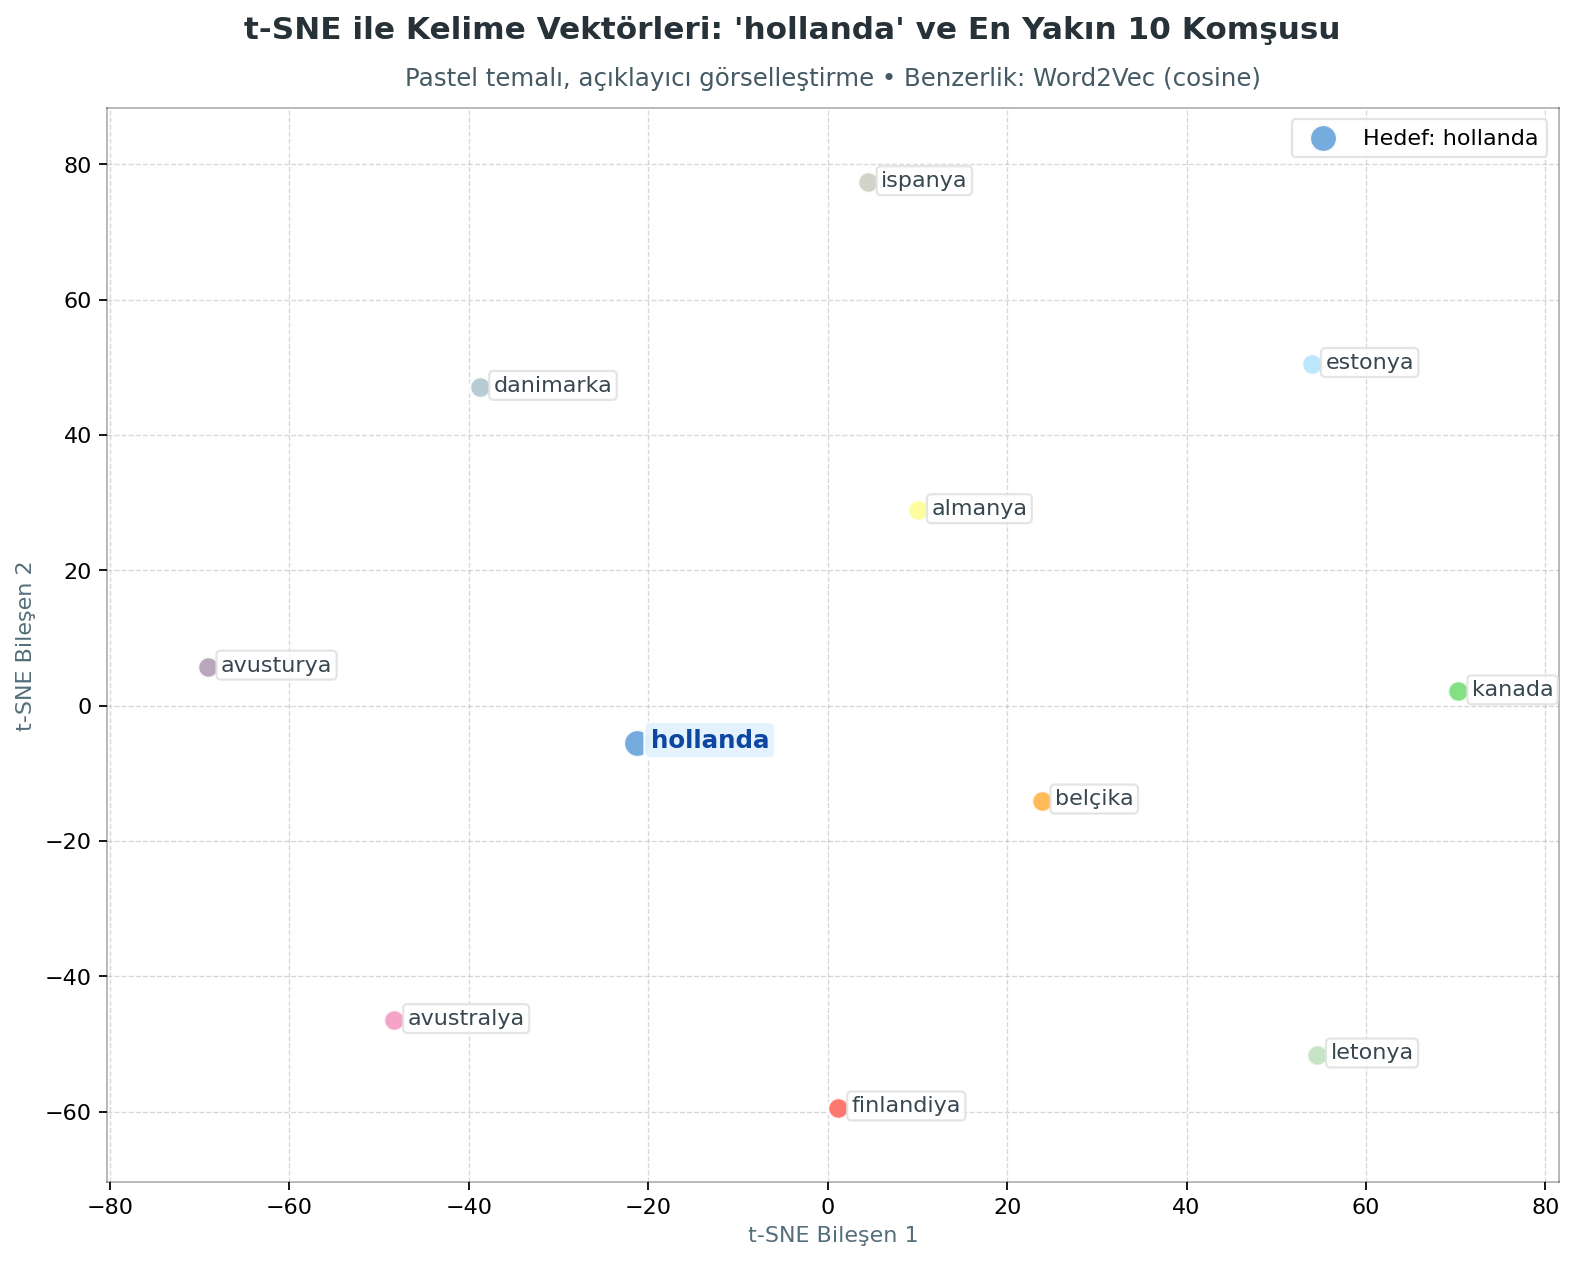

In [20]:
closestwords_tsneplot(Word2vec_model,'hollanda')

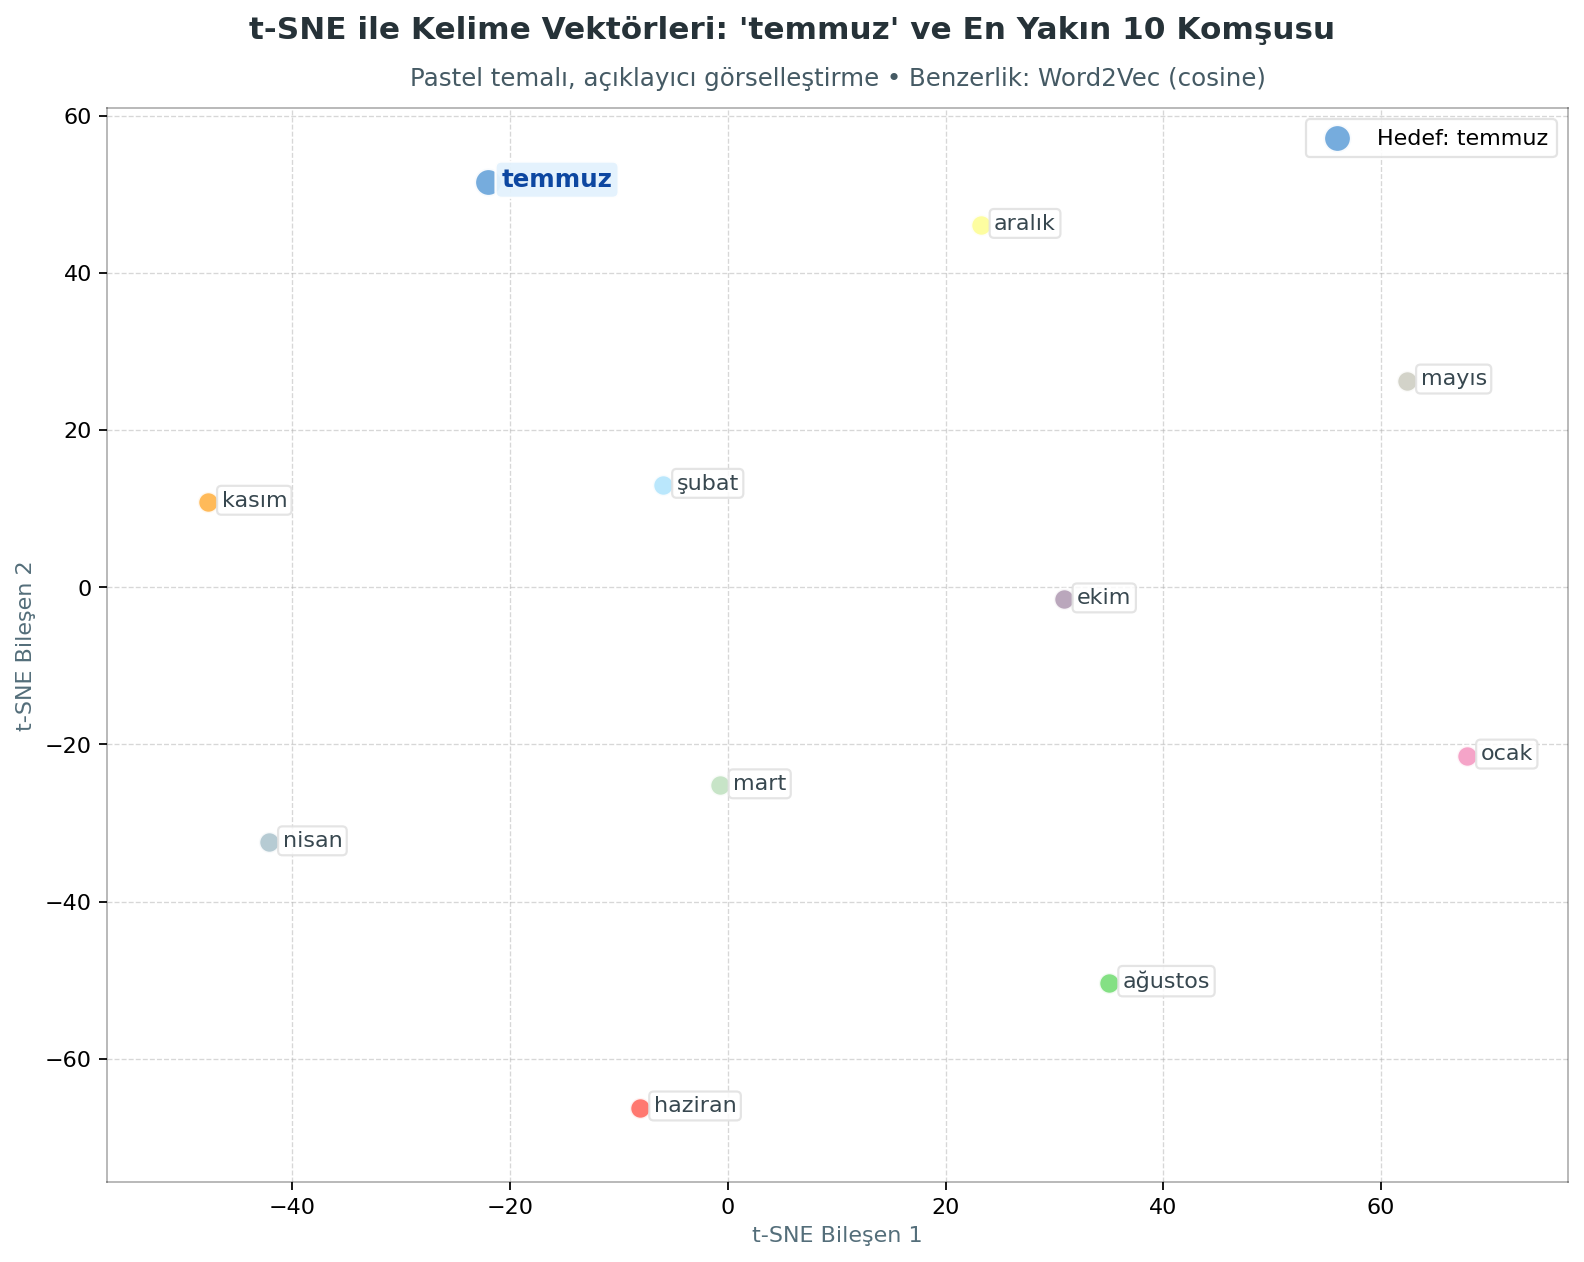

In [22]:
closestwords_tsneplot(Word2vec_model,'temmuz')

# üî° GloVe (Global Vectors for Word Representation)

**GloVe**, kelimelerin **daƒüƒ±tƒ±msal istatistiklerine** dayalƒ± olarak geli≈ütirilen bir kelime g√∂mme (word embedding) y√∂ntemidir.  
Kelime sayma (count-based) yakla≈üƒ±mƒ±nƒ± kullanarak, corpus √ºzerinde pencere tabanlƒ± **co-occurrence (birlikte bulunma)** matrisleri olu≈üturur ve bu matrislerin fakt√∂rizasyonu ile kelime vekt√∂rlerini √ºretir.  

---

## üìä √ñzellikleri
- **Kelime sayma y√∂ntemleri** ile pencereye dayalƒ± matris olu≈üturur.  
- K√º√ß√ºk corpuslarda **iyi performans** sergiler.  
- Vekt√∂rler, kelime √ßiftlerinin **birlikte g√∂r√ºlme olasƒ±lƒ±klarƒ±na** g√∂re √∂ƒürenilir.  
- Word2Vec‚Äôten farklƒ± olarak **global baƒülam bilgisini** dikkate alƒ±r.  

---

## ‚öñÔ∏è Word2Vec ve GloVe Arasƒ±ndaki Format Farklarƒ±
- **GloVe:**  
  - Genellikle **d√ºz metin dosyasƒ±** (√∂r. `.txt`) olarak payla≈üƒ±lƒ±r.  
  - Doƒürudan `gensim` gibi k√ºt√ºphaneler tarafƒ±ndan okunmaz.  

- **Word2Vec:**  
  - **Binary** ya da **metin tabanlƒ±** formatta bulunabilir.  
  - `gensim` gibi ara√ßlar tarafƒ±ndan **doƒürudan desteklenir**.  

‚û°Ô∏è Bu nedenle GloVe vekt√∂rleri, Word2Vec formatƒ±na d√∂n√º≈üt√ºr√ºlerek bu ara√ßlarla kullanƒ±labilir.  

---

## ‚öôÔ∏è Kullanƒ±m Notlarƒ±
- **GloVe**, doƒürudan Python k√ºt√ºphanesi olarak gelmez.  
- Genellikle **√∂nceden eƒüitilmi≈ü vekt√∂rler** (√∂r. Stanford‚Äôun saƒüladƒ±ƒüƒ± `glove.6B.txt` dosyalarƒ±) indirilerek kullanƒ±lƒ±r.  
- `gensim` ile entegrasyon i√ßin d√∂n√º≈üt√ºrme gerekir:  

```python
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# GloVe dosyasƒ±nƒ± Word2Vec formatƒ±na d√∂n√º≈üt√ºr
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

# Modeli y√ºkle
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# √ñrnek: En yakƒ±n kelimeleri bulma
print(model.most_similar('king'))


In [23]:
# Glove
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [24]:
# ---- GloVe ile eƒüitilmi≈ü Wikipedia verisi ----
# glove_input deƒüi≈ükeni: GloVe modelinden alƒ±nan hazƒ±r vekt√∂r dosyasƒ±.
# Bu dosyada her satƒ±r ≈üu yapƒ±da:
# "kelime  v1  v2  v3 ... v100"
# Yani bir kelimenin 100 boyutlu sayƒ±sal vekt√∂r temsili var.

glove_input = '/content/glove.6B.100d.txt'
# 6B = 6 milyar kelimelik corpus (Wikipedia + Gigaword)
# 100d = her kelime i√ßin 100 boyutlu vekt√∂r

word2vec_output = 'glove.6B.100d.word2vec'
# √áƒ±kƒ±≈ü dosyasƒ± adƒ±. GloVe formatƒ± Word2Vec k√ºt√ºphanesiyle birebir uyumlu olmadƒ±ƒüƒ± i√ßin,
# bu dosyayƒ± d√∂n√º≈üt√ºr√ºp Word2Vec'in anlayacaƒüƒ± formata yazacaƒüƒ±z.

# ---- GloVe ‚Üí Word2Vec d√∂n√º≈ü√ºm√º ----
# gensim k√ºt√ºphanesi "glove2word2vec" fonksiyonunu saƒülar.
# Bu fonksiyon, GloVe vekt√∂rlerini Word2Vec'in okuyabileceƒüi ≈üekilde √ßevirir.
# (Yani header ekler: kelime sayƒ±sƒ± ve vekt√∂r boyutu bilgisini yazar.)

from gensim.scripts.glove2word2vec import glove2word2vec

glove2word2vec(glove_input, word2vec_output)
# Bu i≈ülem sonucunda:
#  - Toplam 42,766 kelime (Wikipedia + Gigaword corpus'tan)
#  - Her biri 100 boyutlu vekt√∂r
# Word2Vec formatƒ±nda saklanƒ±r.

/tmp/ipython-input-1616889966.py:22: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input, word2vec_output)


(400000, 100)

In [25]:
# ---- GloVe modelini Word2Vec formatƒ±nda y√ºkleme ----
# Artƒ±k d√∂n√º≈üt√ºr√ºlm√º≈ü dosyayƒ± KeyedVectors ile okuyabiliriz.
# KeyedVectors: yalnƒ±zca kelime vekt√∂rlerini tutan hafif bir yapƒ±.
# (Eƒüitim yapmaz, sadece hazƒ±r vekt√∂rleri y√ºkler.)

from gensim.models import KeyedVectors

glove_model = KeyedVectors.load_word2vec_format(
    word2vec_output,  # GloVe ‚Üí Word2Vec formatƒ±na d√∂n√º≈üt√ºrd√ºƒü√ºm√ºz dosya
    binary=False      # Dosya metin (txt) formatƒ±nda olduƒüu i√ßin False
)

# Artƒ±k glove_model √ºzerinden kelime vekt√∂rlerine eri≈üebiliriz.

In [26]:
# ankara kelimesine benzer kelimeleri getirsin:

glove_model.most_similar('ankara')

[('turkey', 0.7512096166610718),
 ('istanbul', 0.6787630319595337),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322181820869446),
 ('erdogan', 0.6258037090301514),
 ('moscow', 0.6217040419578552),
 ('brussels', 0.6181437969207764),
 ('skopje', 0.6164302229881287),
 ('cyprus', 0.606403112411499)]

In [27]:
glove_model.most_similar(positive=['woman', 'son'], negative=['man'], topn=1)
# dili ne kadar anladƒ±ƒüƒ±nƒ± test etmek i√ßin bakƒ±labilir.

[('daughter', 0.9090957641601562)]

In [28]:
# √ºlkeler ve √ºlkeler arasƒ± ba≈ükentlerin ili≈ükisini test edelim:
glove_model.most_similar(positive=['bangkok', 'germany'], negative=['berlin'], topn=1)

[('thailand', 0.8427271246910095)]

# ü§î Hangisi Daha ƒ∞yi? Word2Vec mi, GloVe mu?

Bu sorunun kesin bir cevabƒ± yoktur; se√ßim **√ßalƒ±≈üƒ±lacak veriye ve ara≈ütƒ±rma amacƒ±na** baƒülƒ±dƒ±r.  

---

## üîπ Word2Vec
- **Baƒülama dayalƒ± kelime ili≈ükilerini** daha iyi analiz eder.  
- √ñrneƒüin, *‚Äúbook‚Äù* ile *‚Äúread‚Äù* gibi **baƒülamsal ili≈ükiler** arƒ±yorsanƒ±z Word2Vec genellikle daha ba≈üarƒ±lƒ±dƒ±r.  
- K√º√ß√ºk ve baƒülama √∂zg√º veri k√ºmelerinde tercih edilir.  

---

## üîπ GloVe
- **Global √∂l√ßekte kelime ili≈ükilerini** modellemek i√ßin uygundur.  
- Analojiler ve genel kelime benzerliklerinde daha ba≈üarƒ±lƒ±dƒ±r.  
  - √ñrneƒüin: *‚ÄúParis‚Äù ‚Äì ‚ÄúFrance‚Äù + ‚ÄúItaly‚Äù = ‚ÄúRome‚Äù*  
- B√ºy√ºk ve genel veri k√ºmelerinde daha iyi performans g√∂sterir.  

---

## üéØ √ñzet
- **K√º√ß√ºk & baƒülama √∂zg√º corpus ‚Üí** ‚úÖ Word2Vec  
- **B√ºy√ºk & genel corpus ‚Üí** ‚úÖ GloVe  

> Hangisinin daha iyi olduƒüu, **√ßalƒ±≈ümanƒ±n baƒülamƒ±nda gizlidir**. Doƒüru se√ßim, veri k√ºmesinin niteliƒüine ve √ß√∂z√ºlmek istenen probleme g√∂re yapƒ±lmalƒ±dƒ±r.

# **Vekt√∂rlerin Benzerlik √ñl√ß√ºmleri**

# üìè Euclidean Distance (√ñklid Mesafesi)

**√ñklid mesafesi (Euclidean distance)**, iki nokta veya vekt√∂r arasƒ±ndaki **doƒürusal (doƒüru √ßizgi) mesafeyi** √∂l√ßmek i√ßin kullanƒ±lan en temel y√∂ntemlerden biridir.  
Matematikte, iki nokta arasƒ±ndaki **en kƒ±sa mesafe** olarak tanƒ±mlanƒ±r.  

---

## üîπ Matematiksel Tanƒ±m
ƒ∞ki vekt√∂r $x = (x_1, x_2, ..., x_n)$ ve $y = (y_1, y_2, ..., y_n)$ arasƒ±ndaki √ñklid mesafesi:

\[
d(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
\]

---

## üîπ NLP Baƒülamƒ±nda Kullanƒ±mƒ±
- Kelimeler veya belgeler **vekt√∂rlerle temsil edildiƒüinde**, aralarƒ±ndaki **benzerliƒüi** √∂l√ßmek i√ßin kullanƒ±labilir.  
- Mesafe **k√º√ß√ºld√ºk√ße**, iki kelime ya da belgenin **birbirine daha benzer** olduƒüu yorumu yapƒ±lƒ±r.  

---

## üìå √ñrnek Python Kodu
```python
import numpy as np
from numpy.linalg import norm

# ƒ∞ki vekt√∂r tanƒ±mlayalƒ±m
vec1 = np.array([1, 2, 3])
vec2 = np.array([4, 5, 6])

# Euclidean distance
euclidean_distance = norm(vec1 - vec2)
print("Euclidean Distance:", euclidean_distance)


In [30]:
# ---- Noktalar arasƒ± mesafe hesaplama ----

# 3-4-5 √º√ßgenini d√º≈ü√ºnelim (Pisagor √º√ßgeni).
# ƒ∞lk nokta (0,0) ‚Üí orijin
point1 = np.array([0, 0])

# ƒ∞kinci nokta (3,4) ‚Üí x=3, y=4 koordinatƒ±
point2 = np.array([3, 4])

# ƒ∞ki nokta arasƒ±ndaki √ñklid mesafesi (Euclidean Distance):
# np.linalg.norm ‚Üí vekt√∂r√ºn normunu (uzunluƒüunu) hesaplar.
# Burada point2 - point1 = [3, 4] vekt√∂r√º
# Norm([3, 4]) = ‚àö(3¬≤ + 4¬≤) = 5
distance = np.linalg.norm(point2 - point1)

print("√ñklid Mesafesi:", distance)

√ñklid Mesafesi: 5.0


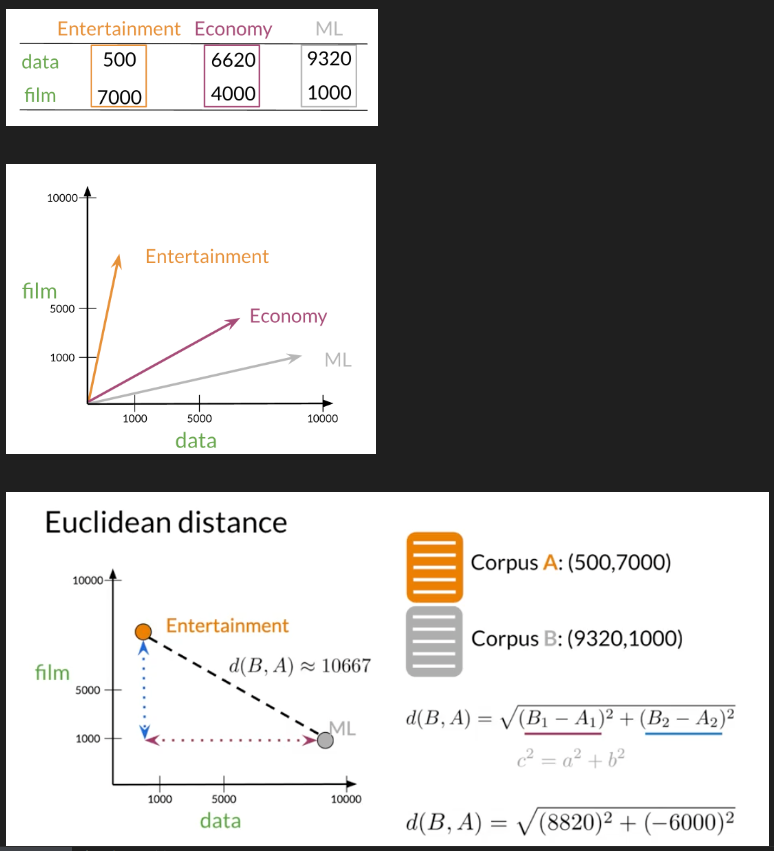

In [31]:
import numpy as np
from scipy.spatial.distance import euclidean

# ---- ƒ∞ki vekt√∂r arasƒ±ndaki √ñklid mesafesi ----

# √ñrneƒüin iki farklƒ± "corpus" (metin koleksiyonu) i√ßin sayƒ±sal √∂zelliklerimiz var:
# vector_corpusA = [500, 7000]
# vector_corpusB = [9320, 1000]
# Bunlar her corpus'un iki boyutlu √∂zelliklerini temsil ediyor olabilir.
# (√∂rneƒüin: [kelime sayƒ±sƒ±, c√ºmle uzunluƒüu] gibi)

vector_corpusA = np.array([500, 7000])
vector_corpusB = np.array([9320, 1000])

# √ñklid mesafesini hesaplamak i√ßin scipy'nin euclidean() fonksiyonunu kullanƒ±yoruz.
# Form√ºl:
# d = ‚àö((x2 - x1)¬≤ + (y2 - y1)¬≤)

distance = euclidean(vector_corpusA, vector_corpusB)

# Sonucu ekrana yazdƒ±ralƒ±m
print("Euclidean Distance (corpusA ve corpusB):", distance)


Euclidean Distance (corpusA ve corpusB): 10667.35206131306


In [32]:
import numpy as np
from scipy.spatial.distance import euclidean

# ---- ƒ∞ki corpus arasƒ±ndaki mesafe (ML ve Economy) ----

# vector_corpusC: √ñrneƒüin "Machine Learning" (ML) ile ilgili corpus'un √∂zellikleri
# vector_corpusB: √ñrneƒüin "Economy" ile ilgili corpus'un √∂zellikleri
# Her vekt√∂r iki boyutlu bir temsil (√∂r: [kelime sayƒ±sƒ±, ortalama c√ºmle uzunluƒüu])

vector_corpusC = np.array([6620, 4000])
vector_corpusB = np.array([9320, 1000])

# √ñklid mesafesini (Euclidean Distance) hesaplƒ±yoruz.
# Form√ºl: d = ‚àö((x2 - x1)¬≤ + (y2 - y1)¬≤)
distance = euclidean(vector_corpusC, vector_corpusB)

# Sonucu ekrana yazdƒ±ralƒ±m
print("Euclidean Distance (corpusC ve corpusB):", distance)

Euclidean Distance (corpusC ve corpusB): 4036.087214122113


## üìä **Euclidean Distance (√ñklid Uzaklƒ±ƒüƒ±) Deƒüer Aralƒ±ƒüƒ±**

- **0‚Äôa yakƒ±n deƒüerler:**  
  ƒ∞ki vekt√∂r (kelime ya da belge) birbirine olduk√ßa benzerdir.  
  > √ñrnek: *‚Äúkitap‚Äù* ve *‚Äúdefter‚Äù* gibi benzer baƒülama sahip kelimeler.  

- **B√ºy√ºk deƒüerler:**  
  Vekt√∂rler arasƒ±ndaki mesafe fazladƒ±r; kelimelerin ya da belgelerin baƒülamlarƒ± birbirinden olduk√ßa uzaktƒ±r.  
  > √ñrnek: *‚Äúkitap‚Äù* ve *‚Äúu√ßak‚Äù* gibi farklƒ± kavramlar.  

---

### üéØ Yorum
- Euclidean Distance, benzerlik yerine **mutlak uzaklƒ±k** √∂l√ßt√ºƒü√º i√ßin,  
  - **K√º√ß√ºk deƒüerler ‚Üí y√ºksek benzerlik**  
  - **B√ºy√ºk deƒüerler ‚Üí d√º≈ü√ºk benzerlik**  
- Bu nedenle √∂zellikle kelime g√∂mme (word embeddings) uzayƒ±nda, iki kelime arasƒ±ndaki **anlamsal yakƒ±nlƒ±ƒüƒ± √∂l√ßmek** i√ßin kullanƒ±labilir.  

# üìê Cosine Similarity (Kosin√ºs Benzerliƒüi)

**Cosine Similarity**, iki vekt√∂r arasƒ±ndaki a√ßƒ±nƒ±n kosin√ºs√ºn√º √∂l√ßer.  
- Eƒüer vekt√∂rler birbirine **yakƒ±n y√∂nlere sahipse**, aralarƒ±ndaki a√ßƒ± k√º√ß√ºl√ºr ve kosin√ºs deƒüeri **1‚Äôe yakla≈üƒ±r**.  
- Eƒüer vekt√∂rler birbirine **dik** (90¬∞) ise, kosin√ºs deƒüeri **0‚Äôa yakla≈üƒ±r**.  
- Eƒüer vekt√∂rler tamamen zƒ±t y√∂nlere sahipse, kosin√ºs deƒüeri **-1** olur.  

---

## üîπ Matematiksel Tanƒ±m
ƒ∞ki vekt√∂r $x$ ve $y$ arasƒ±ndaki kosin√ºs benzerliƒüi:

\[
\text{cosine\_similarity}(x,y) = \frac{x \cdot y}{\|x\|\|y\|}
\]

Burada:  
- $x \cdot y$ ‚Üí Vekt√∂rlerin noktasal √ßarpƒ±mƒ± (dot product)  
- $\|x\|$ ve $\|y\|$ ‚Üí Vekt√∂rlerin normlarƒ± (uzunluklarƒ±)  

---

## üîπ NLP Baƒülamƒ±nda Kullanƒ±mƒ±
- Corpus‚Äôtan elde edilen kelime ya da belge vekt√∂rlerinin **y√∂nlerini kar≈üƒ±la≈ütƒ±rmak** i√ßin kullanƒ±lƒ±r.  
- Euclidean Distance, **vekt√∂rlerin b√ºy√ºkl√ºklerinden** etkilenirken, Cosine Similarity yalnƒ±zca **vekt√∂rlerin y√∂n√ºn√º** dikkate alƒ±r.  
- Bu nedenle metin madenciliƒüi ve bilgi eri≈üimi uygulamalarƒ±nda **daha kararlƒ±** bir benzerlik √∂l√ß√ºs√ºd√ºr.  

---

## üìå √ñrnek Python Kodu
```python
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# √ñrnek vekt√∂rler
vec1 = np.array([[1, 2, 3]])
vec2 = np.array([[4, 5, 6]])

# Cosine similarity
cos_sim = cosine_similarity(vec1, vec2)
print("Cosine Similarity:", cos_sim[0][0])

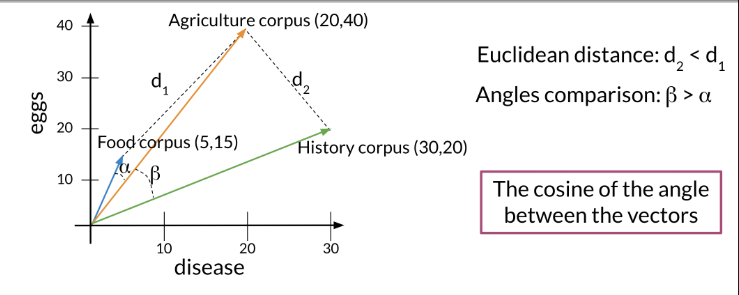

## üìä Euclidean Distance vs Cosine Similarity √ñrneƒüi

Normalde **gƒ±da corpus‚Äôu** ile **tarƒ±m corpus‚Äôu** anlamsal olarak birbirine daha benzerdir.  
Ancak pratikte ≈üu durum g√∂zlemlenebilir:  

- Gƒ±da corpus‚Äôu, tarƒ±m corpus‚Äôuna g√∂re **daha k√º√ß√ºk boyutludur**.  
- **Tarih corpus‚Äôu** ile tarƒ±m corpus‚Äôu aslƒ±nda daha farklƒ± i√ßeriklere sahiptir,  
  fakat boyut farkƒ±ndan dolayƒ± **√ñklid mesafesi daha k√º√ß√ºk** √ßƒ±kabilir.  

---

### üéØ Yorum
Bu gibi durumlarda:  
- **Euclidean Distance**, vekt√∂rlerin **b√ºy√ºkl√ºklerinden** etkilendiƒüi i√ßin yanƒ±ltƒ±cƒ± sonu√ßlar verebilir.  
- **Cosine Similarity**, yalnƒ±zca vekt√∂rlerin **y√∂nlerini** dikkate aldƒ±ƒüƒ± i√ßin, ger√ßek anlamsal benzerliƒüi daha doƒüru yansƒ±tƒ±r.  

‚û°Ô∏è Yani corpus b√ºy√ºkl√ºklerinin farklƒ±lƒ±k g√∂sterdiƒüi senaryolarda, **Cosine Similarity kullanmak daha anlamlƒ±dƒ±r.**


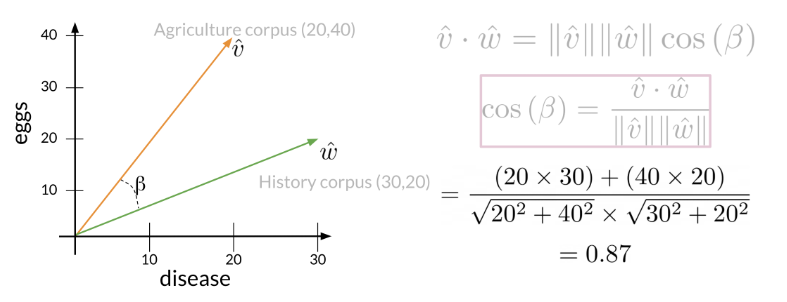

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# ---- Vekt√∂rler ----
# Her corpus'u (tarƒ±m, tarih, yemek) iki boyutlu bir vekt√∂rle temsil ediyoruz.
# Buradaki sayƒ±lar √∂rnek √∂zellikler olabilir (√∂rn: [kelime sayƒ±sƒ±, kavram sƒ±klƒ±ƒüƒ±]).

vector_agric = np.array([20, 40]).reshape(1, -1)   # Tarƒ±m (agriculture)
vector_hist  = np.array([30, 20]).reshape(1, -1)   # Tarih (history)
vector_food  = np.array([5, 15]).reshape(1, -1)    # Yemek (food)

# ---- Cosine Similarity Hesaplama ----
# Cosine Similarity = (A ¬∑ B) / (||A|| * ||B||)
# Yani iki vekt√∂r arasƒ±ndaki a√ßƒ±yƒ± √∂l√ßer.
# 1'e yakƒ±n ‚Üí √ßok benzer (aynƒ± y√∂nde)
# 0'a yakƒ±n ‚Üí benzer deƒüil (dik a√ßƒ±)
# -1'e yakƒ±n ‚Üí zƒ±t y√∂nde

cos_sim_agric_hist = cosine_similarity(vector_agric, vector_hist)[0][0]
cos_sim_agric_food = cosine_similarity(vector_agric, vector_food)[0][0]
cos_sim_hist_food  = cosine_similarity(vector_hist, vector_food)[0][0]

# ---- Sonu√ßlarƒ± Yazdƒ±rma ----
print("Cosine Similarity (agric ve hist):", cos_sim_agric_hist)
print("Cosine Similarity (agric ve food):", cos_sim_agric_food)
print("Cosine Similarity (hist ve food):", cos_sim_hist_food)

Cosine Similarity (agric ve hist): 0.8682431421244592
Cosine Similarity (agric ve food): 0.9899494936611665
Cosine Similarity (hist ve food): 0.7893522173763263


## üìê **Cosine Similarity (Kosin√ºs Benzerliƒüi) Deƒüer Aralƒ±ƒüƒ±**

Cosine Similarity, iki vekt√∂r arasƒ±ndaki a√ßƒ±nƒ±n kosin√ºs√ºn√º √∂l√ßer.  
Deƒüer aralƒ±ƒüƒ± kullanƒ±lan baƒülama g√∂re deƒüi≈üebilir:  

- **[0, 1] aralƒ±ƒüƒ±:** Genellikle metin benzerliƒüi uygulamalarƒ±nda kullanƒ±lƒ±r.  
- **[‚àí1, 1] aralƒ±ƒüƒ±:** Matematiksel olarak t√ºm deƒüer aralƒ±ƒüƒ±dƒ±r.  

---

### üîπ Yorumlar
- **1 ‚Üí** ƒ∞ki kelime vekt√∂r√º aynƒ± y√∂ndedir (**tamamen benzer**).  
- **0 ‚Üí** ƒ∞ki kelime vekt√∂r√º arasƒ±nda ili≈üki yoktur.  
- **‚àí1 ‚Üí** ƒ∞ki kelime vekt√∂r√º tamamen zƒ±ttƒ±r (**zƒ±t anlamlƒ±**).  

---

### üîπ √ñrnek Senaryolar

#### ‚úÖ Benzer Kelimeler
- **Y√ºksek cosine similarity (‚àº0.8 ‚àí 1.0)**  
- **D√º≈ü√ºk Euclidean distance**  
- Bu kelimeler aynƒ± baƒülamda sƒ±k√ßa birlikte kullanƒ±lƒ±r.  
- **√ñrnek:** *‚Äúelma‚Äù* ve *‚Äúarmut‚Äù*  

---

#### ‚öñÔ∏è Farklƒ± Kelimeler
- **D√º≈ü√ºk cosine similarity (‚àº0 ‚àí 0.3)**  
- **Y√ºksek Euclidean distance**  
- Bu kelimeler farklƒ± baƒülamlarda kullanƒ±lƒ±r.  
- **√ñrnek:** *‚Äúaraba‚Äù* ve *‚Äúmuz‚Äù*  

---

#### ‚ùå √áok Zƒ±t Kelimeler (Negatif Cosine Similarity)
- **Cosine similarity < 0** ise, kelimeler zƒ±t anlamlƒ±dƒ±r veya tamamen zƒ±t baƒülamlarda yer alƒ±r.  
- **√ñrnek:** *‚Äúiyi‚Äù* ve *‚Äúk√∂t√º‚Äù*  

---

### üéØ Genel Deƒüerlendirme
- **Cosine Similarity** ‚Üí Vekt√∂rlerin y√∂n√ºn√º √∂l√ßer.  
- **Euclidean Distance** ‚Üí Vekt√∂rlerin b√ºy√ºkl√ºƒü√º ile birlikte mesafeyi √∂l√ßer.  

Bu nedenle metin madenciliƒüi ve kelime g√∂mme uygulamalarƒ±nda **cosine similarity**, anlamsal benzerliƒüi daha doƒüru yansƒ±tmak i√ßin daha sƒ±k tercih edilir.  

# **Word2Vec ile Cosine Similarity & Euclidean Distance Hesaplama**

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

# ---- Word2Vec ile vekt√∂r benzerliƒüi √∂l√ßme ----

# ƒ∞ki kelime se√ßiyoruz:
word1 = "ankara"       # √ñrnek kelime 1
word2 = "b√ºy√ºkel√ßi"    # √ñrnek kelime 2

# √ñnce bu kelimelerin modelde olup olmadƒ±ƒüƒ±nƒ± kontrol ediyoruz.
if word1 in Word2vec_model.wv and word2 in Word2vec_model.wv:
    # Kelimelerin Word2Vec tarafƒ±ndan √∂ƒürenilen vekt√∂rlerini alƒ±yoruz.
    vec1 = Word2vec_model.wv[word1]
    vec2 = Word2vec_model.wv[word2]

    # --- Cosine Similarity ---
    # ƒ∞ki vekt√∂r arasƒ±ndaki a√ßƒ±nƒ±n kosin√ºs√ºn√º hesaplar.
    # 1'e yakƒ±nsa kelimeler √ßok benzer, 0'a yakƒ±nsa ilgisiz, -1'e yakƒ±nsa zƒ±t.
    cosine_sim = cosine_similarity([vec1], [vec2])[0][0]
    print(f"Cosine Similarity ({word1} ve {word2}): {cosine_sim:.4f}")

    # --- Euclidean Distance ---
    # ƒ∞ki vekt√∂r arasƒ±ndaki d√ºz √ßizgi uzunluƒüunu √∂l√ßer.
    # K√º√ß√ºk deƒüerler ‚Üí kelimeler yakƒ±n, b√ºy√ºk deƒüerler ‚Üí uzak.
    euc_distance = euclidean(vec1, vec2)
    print(f"Euclidean Distance ({word1} ve {word2}): {euc_distance:.4f}")

else:
    print(f"'{word1}' veya '{word2}' kelimelerinden biri modelde bulunamadƒ±.")

Cosine Similarity (ankara ve b√ºy√ºkel√ßi): 0.6460
Euclidean Distance (ankara ve b√ºy√ºkel√ßi): 3.0195


## üîé √ñrnek Sonu√ß Yorumu

- **Cosine Similarity (0.6326):**  
  ƒ∞ki kelime vekt√∂r√º birbirine tamamen yakƒ±n deƒüildir, ancak **anlamlƒ± bir baƒülam ortaklƒ±ƒüƒ±** vardƒ±r.  
  > Orta seviyede benzerlik ‚Üí kelimeler aynƒ± temada ya da ilgili konularda birlikte kullanƒ±labilir.  

- **Euclidean Distance (3.1262):**  
  Vekt√∂rler arasƒ±nda **belirli farklƒ±lƒ±klar** bulunmasƒ±na raƒümen, tamamen ilgisiz de deƒüildir.  
  > Mesafe deƒüeri √ßok y√ºksek olmadƒ±ƒüƒ±ndan, iki kelime arasƒ±ndaki fark **mutlak kopukluk** anlamƒ±na gelmez.  

---

### üéØ Yorum
- Bu senaryoda, **Cosine Similarity** baƒülamsal yakƒ±nlƒ±ƒüƒ± daha iyi yansƒ±tƒ±r.  
- **Euclidean Distance** ise mutlak uzaklƒ±ƒüƒ± g√∂sterdiƒüinden, corpus b√ºy√ºkl√ºklerinden ve √∂l√ßek farklƒ±lƒ±klarƒ±ndan etkilenmi≈ü olabilir.  
- ƒ∞ki metrik birlikte incelendiƒüinde:  
  - Orta seviyede bir **anlamsal benzerlik**,  
  - Fakat baƒülam a√ßƒ±sƒ±ndan **tam √∂rt√º≈ümeme** durumu s√∂z konusudur.  


# **GloVe ile Cosine Similarity & Euclidean Distance Hesaplama**

In [35]:
# ---- Cosine Similarity Fonksiyonu ----
# Cosine Similarity, iki vekt√∂r arasƒ±ndaki a√ßƒ±nƒ±n kosin√ºs√ºn√º √∂l√ßer.
# np.dot(vec1, vec2) ‚Üí iki vekt√∂r√ºn skaler √ßarpƒ±mƒ±
# norm(vec1) ‚Üí vec1'in uzunluƒüu
# norm(vec2) ‚Üí vec2'nin uzunluƒüu
# Form√ºl:
# cos(Œ∏) = (A ¬∑ B) / (||A|| * ||B||)

from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))


# ---- √ñrnek Kelimeler ----
# GloVe modeli ƒ∞ngilizce olduƒüu i√ßin 'b√ºy√ºkel√ßi' yerine 'ambassador' kelimesini kullandƒ±k.
vector_ankara = glove_model['ankara']
vector_buyukelci = glove_model['ambassador']

# ---- Cosine Similarity Hesaplama ----
cos_sim = cosine_similarity(vector_ankara, vector_buyukelci)

print(f"Cosine Similarity (ankara ve b√ºy√ºkel√ßi): {cos_sim:.4f}")

Cosine Similarity (ankara ve b√ºy√ºkel√ßi): 0.3998


In [36]:
from scipy.spatial.distance import euclidean

# ---- Euclidean Distance Hesaplama ----
# Euclidean Distance (√ñklid Mesafesi), iki vekt√∂r arasƒ±ndaki d√ºz √ßizgi uzunluƒüunu √∂l√ßer.
# Form√ºl:
# d = ‚àöŒ£ (xi - yi)¬≤

# Burada "ankara" ve "ambassador" (b√ºy√ºkel√ßi) vekt√∂rleri arasƒ±ndaki mesafeyi buluyoruz.
eucl_dist = euclidean(vector_ankara, vector_buyukelci)

print(f"Euclidean Distance (ankara ve b√ºy√ºkel√ßi): {eucl_dist:.4f}")

Euclidean Distance (ankara ve b√ºy√ºkel√ßi): 6.5609


## üìä √ñrnek Deƒüerlerin Yorumu

- **Cosine Similarity (0.3998):**  
  - *‚Äúankara‚Äù* ve *‚Äúb√ºy√ºkel√ßi‚Äù* kelimeleri arasƒ±nda **anlamlƒ± fakat g√º√ßl√º olmayan bir benzerlik** vardƒ±r.  
  - Deƒüer **0 ile 1** arasƒ±nda olduƒüundan:  
    - **0‚Äôa yakƒ±n deƒüerler ‚Üí** Zayƒ±f ili≈üki  
    - **1‚Äôe yakƒ±n deƒüerler ‚Üí** G√º√ßl√º ili≈üki  
  - 0.3998 deƒüeri, kelimelerin **kƒ±smi bir baƒülam ortaklƒ±ƒüƒ±** olduƒüunu g√∂sterir.  

---

- **Euclidean Distance (6.560):**  
  - ƒ∞ki kelime arasƒ±ndaki baƒülamsal uzaklƒ±ƒüƒ±n **belirgin** olduƒüunu ifade eder.  
  - **D√º≈ü√ºk mesafeler ‚Üí** Kelimeler birbirine daha benzer.  
  - **Y√ºksek mesafeler ‚Üí** Kelimeler farklƒ± baƒülamlarda kullanƒ±lƒ±r.  
  - 6.560 deƒüeri, *‚Äúankara‚Äù* ve *‚Äúb√ºy√ºkel√ßi‚Äù* kelimelerinin vekt√∂r uzayƒ±nda **ayrƒ± konumlandƒ±ƒüƒ±nƒ±** g√∂sterir.  

---

### üéØ Genel Yorum
- Cosine Similarity ‚Üí **Y√∂nsel benzerliƒüi** √∂l√ßerek orta d√ºzeyde bir ili≈üki olduƒüunu g√∂stermektedir.  
- Euclidean Distance ‚Üí **Mutlak uzaklƒ±ƒüƒ±** √∂l√ßerek baƒülamsal farkƒ±n daha baskƒ±n olduƒüunu ortaya koymaktadƒ±r.  
- Sonu√ß: Kelimeler arasƒ±nda **tam bir anlamsal √∂rt√º≈üme olmasa da**, baƒülamsal d√ºzeyde kƒ±smi bir baƒülantƒ± vardƒ±r.  